# What is the most optimal skill to learn for Data Analysts?
## Methodology
1. Continue from last notebook to find percent of postings with skill
2. Visualize median salary vs percent skill demand
3. Determine if certain technologies are more prevalent

### Import Libraries and Data

In [2]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import ast
import matplotlib.ticker as ticker
import seaborn as sns
from adjustText import adjust_text

df = pd.read_csv("C:\\Users\\pc\\OneDrive\\Desktop\\Python_Data_Analytics_Course\\CSVs\\data_jobs.csv")
# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if isinstance(skills, str) else skills)

1. Clean Data.

In [3]:
df_DA_US = df.copy()

df_DA_US = df_DA_US[(df_DA_US['job_country'] == 'United States') & (df_DA_US['job_title_short'] == 'Data Analyst')]

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US_exploded = df_DA_US[['job_skills', 'salary_year_avg']].explode('job_skills')

df_DA_US_exploded

,job_skills,salary_year_avg
109,python,89000.0
109,r,89000.0
109,alteryx,89000.0
109,tableau,89000.0
180,excel,90250.0
...,...,...
784882,sql,87500.0
784882,vba,87500.0
784882,tableau,87500.0
784882,excel,87500.0


2. Calculate Percent of Job Postings that Have Skills, and Median Salary vs Percent Skill Demand

In [5]:
skill_limit = 5

# First, calculate df_DA_skills
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_US)  # Find count of Data Analyst jobs in US with salary info

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

# Now filter for high demand skills
df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_limit]

df_DA_skills = df_DA_skills[df_DA_skills['skill_percent'] > 5]

df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


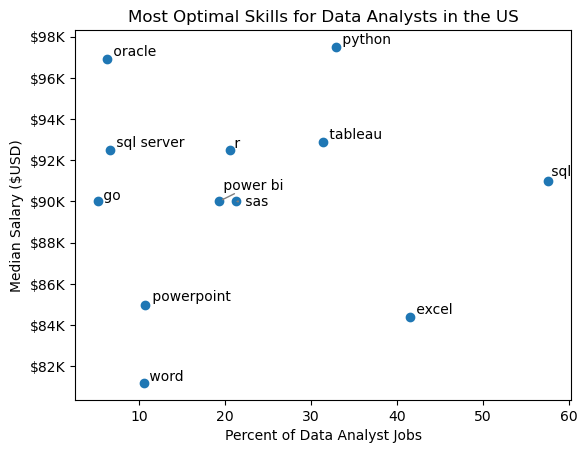

In [6]:

plt.scatter(df_DA_skills_high_demand['skill_percent'], df_DA_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts in the US')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

3. Coloring by Technology

In [4]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

# turn dictionary into dataframe
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_DA_skills_tech = df_DA_skills.merge(df_technology, left_on='job_skills', right_on='skills').drop_duplicates(subset='skills')

df_DA_skills_tech

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word
10,286,92500.00,6.574713,databases,sql server


In [5]:
skill = df_DA_skills_tech['skills'].to_list()

skill

['sql',
 'excel',
 'python',
 'tableau',
 'sas',
 'r',
 'power bi',
 'powerpoint',
 'word',
 'sql server',
 'oracle',
 'go']

4. plot by `df_DA_skills_tech`

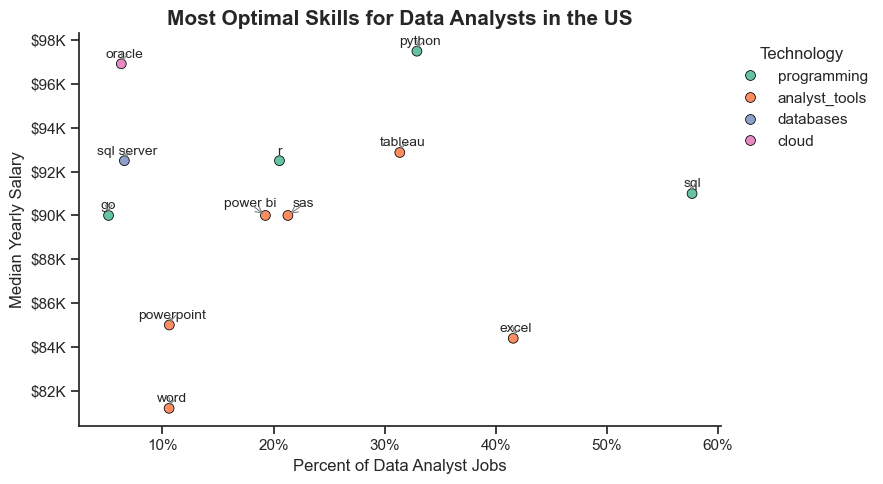

In [8]:

# Set theme and figure size
sns.set_theme(style='ticks')
plt.figure(figsize=(9, 5))

# Plot the scatterplot
scatter = sns.scatterplot(
    data=df_DA_skills_tech,
    x='skill_percent',
    y='median_salary',
    hue='technology',
    palette='Set2',         # Optional: more distinct colors
    s=50,                   # Marker size
    edgecolor='black'       # Add marker outline for clarity
)

# Remove top/right spines
sns.despine()

# Prepare label texts
texts = []
for i in range(len(df_DA_skills_tech)):
    x = df_DA_skills_tech['skill_percent'].iloc[i]
    y = df_DA_skills_tech['median_salary'].iloc[i]
    label = skill[i]
    texts.append(plt.text(x, y, label, fontsize=10 , ha='center', va='bottom'))

# Adjust text to avoid overlap
adjust_text(
    texts,
    arrowprops=dict(arrowstyle='->', color='gray', lw=0.8),
    expand_text=(4, 3),
    expand_points=(1, 1),
    force_points=0.1,
    force_text=0.5
)

# Format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(decimals=0))

# Set axis labels and title
plt.xlabel('Percent of Data Analyst Jobs', fontsize=12)
plt.ylabel('Median Yearly Salary', fontsize=12)
plt.title('Most Optimal Skills for Data Analysts in the US', fontsize=15, weight='bold')

# Improve legend
plt.legend(title='Technology', loc='upper left', bbox_to_anchor=(1, 1), frameon=False)

# Tidy layout
plt.tight_layout()
plt.show()
